## CS109  Home Work 1 

In [1]:
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np

In [2]:
def getZIP(zipFileName):
    r = requests.get(zipFileName).content
    s = BytesIO(r)
    zf = ZipFile(s, 'r') # Read in a list of zipped files
    return zf

In [3]:
url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
zf = getZIP(url)
type(zf)

zipfile.ZipFile

In [4]:
#dir(zf)
salaries_str = str(zf.read("Salaries.csv"))
salaries_str[:100]

"b'yearID,teamID,lgID,playerID,salary\\r\\n1985,BAL,AL,murraed02,1472819\\r\\n1985,BAL,AL,lynnfr01,109000"

In [5]:
salaries_str =salaries_str.replace('\\r\\n',',')
salaries_str = salaries_str[2:-2]
salaries_str[:100]

'yearID,teamID,lgID,playerID,salary,1985,BAL,AL,murraed02,1472819,1985,BAL,AL,lynnfr01,1090000,1985,B'

In [6]:
salaries_list = salaries_str.split(',')
salaries_list[:10]

['yearID',
 'teamID',
 'lgID',
 'playerID',
 'salary',
 '1985',
 'BAL',
 'AL',
 'murraed02',
 '1472819']

In [7]:
nrows = int(len(salaries_list)/5 -1)
nrows

23956

In [8]:
salaries = pd.DataFrame(data = np.array(salaries_list[5:]).reshape(nrows,5), columns=salaries_list[:5])

salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [9]:
## reading Teams.csv
teams_str = str(zf.read('Teams.csv'))
teams_str =teams_str.replace('\\r\\n',',') 
teams_str = teams_str[2:-2]
teams_list = teams_str.split(',')
#teams_list[:48]

nrows = int(len(teams_list)/48 -1)
nrows

2745

In [10]:
teams = pd.DataFrame(data = np.array(teams_list[48:]).reshape(nrows, 48), columns = teams_list[:48])

In [11]:
any(teams.isna())

True

In [12]:
len(teams)

2745

In [13]:
## other way
salaries =pd.read_csv(zf.open("Salaries.csv"))
teams = pd.read_csv(zf.open("Teams.csv"))

In [14]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame.

In [25]:
salaries_grouped =salaries.groupby(['yearID','teamID'], as_index=False).sum()
salaries_grouped.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [30]:
merged_df = pd.merge(salaries_grouped, teams, how = "inner", on = ['teamID', 'yearID'])[['teamID', 'yearID','salary','W']]

In [31]:
merged_df.head()

,teamID,yearID,salary,W
0,ATL,1985,14807000,66
1,BAL,1985,11560712,83
2,BOS,1985,10897560,81
3,CAL,1985,14427894,90
4,CHA,1985,9846178,85


In [33]:
%matplotlib inline 

import matplotlib.pyplot as plt

In [38]:
np.unique(merged_df.teamID, return_counts=True)

merged_df[merged_df.yearID==1985]

,teamID,yearID,salary,W
0,ATL,1985,14807000,66
1,BAL,1985,11560712,83
2,BOS,1985,10897560,81
3,CAL,1985,14427894,90
4,CHA,1985,9846178,85
5,CHN,1985,12702917,77
6,CIN,1985,8359917,89
7,CLE,1985,6551666,60
8,DET,1985,10348143,84
9,HOU,1985,9993051,83


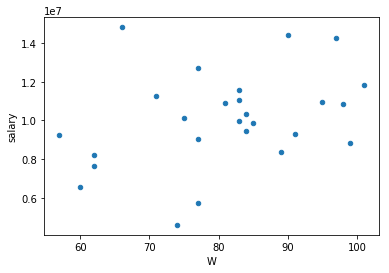

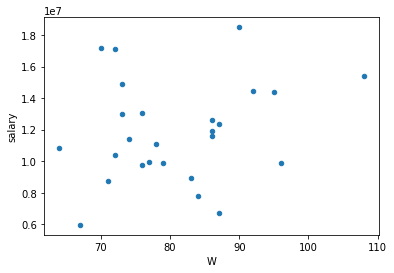

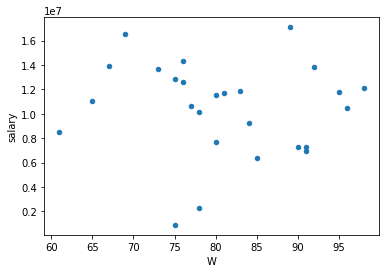

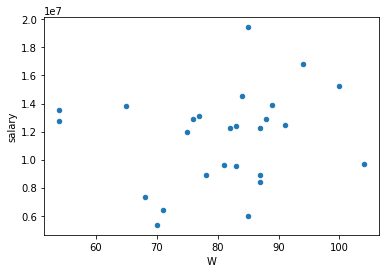

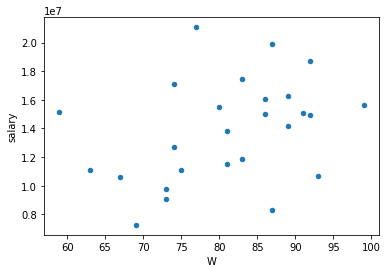

In [43]:

for year in np.unique(merged_df.yearID)[:5]:
    merged_df[merged_df.yearID ==year].plot.scatter(x='W', y='salary')

### Problem 2

In [263]:
## loading data

request = requests.get("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")

s=BytesIO(request.content)


In [264]:
countries =pd.read_csv(s)

In [265]:
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [187]:
type(countries)

pandas.core.frame.DataFrame

In [188]:
income = pd.read_csv("data.csv")

In [189]:
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [111]:
income.shape

(193, 242)

In [126]:
income.values.shape

(193, 242)

In [190]:
income.values

array([['Afghanistan', 603, 603, ..., 2820, 2880, 2940],
       ['Albania', 667, 667, ..., 21500, 22000, 22500],
       ['Algeria', 715, 716, ..., 18200, 18600, 19000],
       ...,
       ['Yemen', 877, 879, ..., 3790, 3870, 3960],
       ['Zambia', 663, 665, ..., 6310, 6450, 6590],
       ['Zimbabwe', 869, 870, ..., 3070, 3140, 3210]], dtype=object)

In [142]:
income.values.T

(242, 193)

In [191]:
temp_df = pd.DataFrame(income.values.T[1:income.values.T.shape[0]], columns=  list(income.values.T[0]))

In [192]:
temp_df = pd.concat([pd.DataFrame(list(income.columns[1:]),columns =['year']),temp_df], axis=1 )

In [193]:
income = temp_df.copy()

In [194]:
income.head()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,603,667,715,1200,618,757,1510,514,814,...,3430,2130,1760,502,585,682,861,877,663,869
1,1801,603,667,716,1200,620,757,1510,514,816,...,3440,2170,1760,502,586,682,861,879,665,870
2,1802,603,667,717,1200,623,757,1510,514,818,...,3450,2200,1760,502,586,682,861,882,667,871
3,1803,603,667,718,1200,626,757,1510,514,820,...,3340,2170,1760,502,586,682,861,884,668,872
4,1804,603,667,719,1210,628,757,1510,514,822,...,3290,2170,1760,503,586,682,861,887,670,873


In [195]:
income.shape

(241, 194)

In [197]:
income.index = income['year']

In [198]:
income.index

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039',
       '2040'],
      dtype='object', name='year', length=241)

In [199]:
income.head()

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1800,1800,603,667,715,1200,618,757,1510,514,814,...,3430,2130,1760,502,585,682,861,877,663,869
1801,1801,603,667,716,1200,620,757,1510,514,816,...,3440,2170,1760,502,586,682,861,879,665,870
1802,1802,603,667,717,1200,623,757,1510,514,818,...,3450,2200,1760,502,586,682,861,882,667,871
1803,1803,603,667,718,1200,626,757,1510,514,820,...,3340,2170,1760,502,586,682,861,884,668,872
1804,1804,603,667,719,1210,628,757,1510,514,822,...,3290,2170,1760,503,586,682,861,887,670,873


In [217]:
income = income.iloc[:,1:]

In [218]:
income.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1800,603,667,715,1200,618,757,1510,514,814,1850,...,3430,2130,1760,502,585,682,861,877,663,869
1801,603,667,716,1200,620,757,1510,514,816,1850,...,3440,2170,1760,502,586,682,861,879,665,870
1802,603,667,717,1200,623,757,1510,514,818,1860,...,3450,2200,1760,502,586,682,861,882,667,871
1803,603,667,718,1200,626,757,1510,514,820,1870,...,3340,2170,1760,502,586,682,861,884,668,872
1804,603,667,719,1210,628,757,1510,514,822,1880,...,3290,2170,1760,503,586,682,861,887,670,873


In [221]:
income.loc['1800', 'Afghanistan']

603

In [222]:
import matplotlib.pyplot as plt

In [223]:
plt.style.use('ggplot')

In [229]:
income.index = income.index.astype('int')

In [230]:
income.index

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040],
           dtype='int64', name='year', length=241)

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


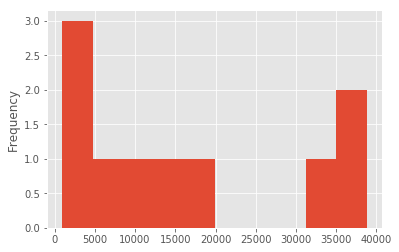

In [251]:
income.ix[2000,0:10].plot.hist()

In [252]:
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [253]:
income.head()



,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1800,603,667,715,1200,618,757,1510,514,814,1850,...,3430,2130,1760,502,585,682,861,877,663,869
1801,603,667,716,1200,620,757,1510,514,816,1850,...,3440,2170,1760,502,586,682,861,879,665,870
1802,603,667,717,1200,623,757,1510,514,818,1860,...,3450,2200,1760,502,586,682,861,882,667,871
1803,603,667,718,1200,626,757,1510,514,820,1870,...,3340,2170,1760,502,586,682,861,884,668,872
1804,603,667,719,1210,628,757,1510,514,822,1880,...,3290,2170,1760,503,586,682,861,887,670,873


In [315]:
def mergeByYear(year):

    common_countries =[]
    for country in countries['Country']:
        if country in income.columns:
            common_countries.append(country)
        
    income_transposed =pd.concat([pd.Series(income.loc[year, common_countries].index), pd.Series(income.loc[year, common_countries].values)],
              axis =1)
    income_transposed.columns= ['Country', 'Income']
    
    return countries.merge(income_transposed, on = ['Country'])
              
              
              

In [316]:
## function to merge countries df and income df by year
## input year --> output - df with columns country, region, income
mergeByYear(1800)
    

,Country,Region,Income
0,Algeria,AFRICA,715
1,Angola,AFRICA,618
2,Benin,AFRICA,597
3,Botswana,AFRICA,397
4,Burundi,AFRICA,418
5,Cameroon,AFRICA,626
6,Cape Verde,AFRICA,529
7,Central African Republic,AFRICA,424
8,Chad,AFRICA,418
9,Comoros,AFRICA,696


In [323]:
def mergeByYear2(year):

    
        
    income_transposed =pd.concat([pd.Series(income.loc[year].index), pd.Series(income.loc[year].values)],
              axis =1)
    income_transposed.columns= ['Country', 'Income']
    
    return countries.merge(income_transposed, on = ['Country'])
              
              

In [325]:
mergeByYear2(1800).head()

,Country,Region,Income
0,Algeria,AFRICA,715
1,Angola,AFRICA,618
2,Benin,AFRICA,597
3,Botswana,AFRICA,397
4,Burundi,AFRICA,418


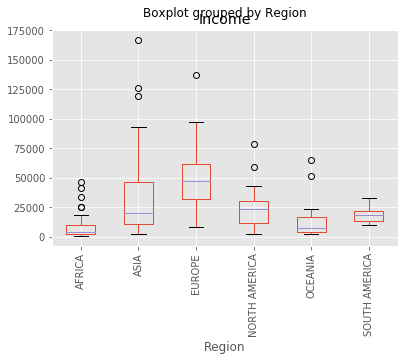

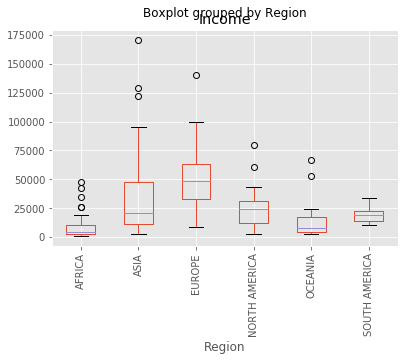

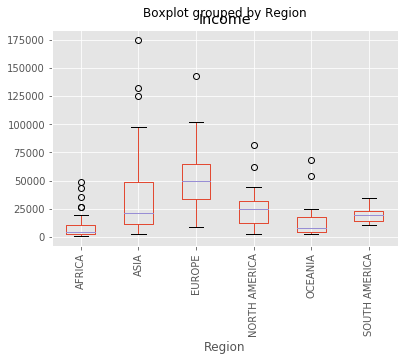

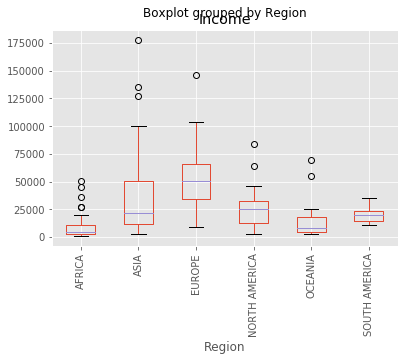

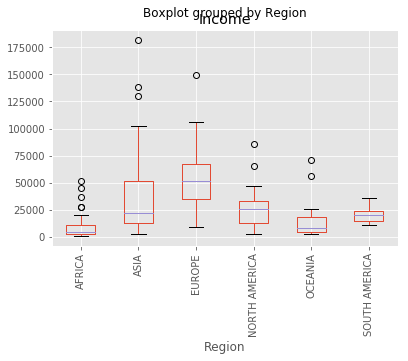

In [352]:
for year in income.index[-5:]:
    grouped_df = mergeByYear(year)[['Region', 'Income']].groupby('Region')
    
    #grouped_df.sum().plot.bar()
    mergeByYear(year).boxplot('Income', by = 'Region', rot= 90)

In [351]:
pd.DataFrame.boxplot?
